In [33]:
import pandas as pd
import numpy as np

import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv('udemy_courses.csv')

In [3]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [4]:
df.shape

(3678, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
# published_timestamp had better convert datetime64

In [7]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [15]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [16]:
df['date'] = pd.to_datetime(df['published_timestamp'])

In [17]:
df1 = df.drop(['course_id','url','published_timestamp'],axis=1)

In [18]:
df1.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18 20:58:58+00:00
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09 16:34:20+00:00
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19 19:26:30+00:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   object             
 11  subject              3678 non-null   object             
 12  date                

In [25]:
df1.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


- sample size büyük olduğu için birkaç tane outlier mean i çok fazla etkilemez. fakat yığılma maksimum değere doğru. Dolayısı ile sağa yatık. 

In [26]:
# not df.describe(include=object) ile categoric değişkenlerin describe da alınabiliyor.

<AxesSubplot:ylabel='Frequency'>

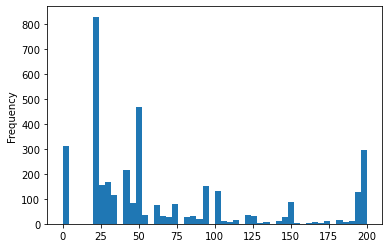

In [29]:
df1.price.plot(kind = 'hist', bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

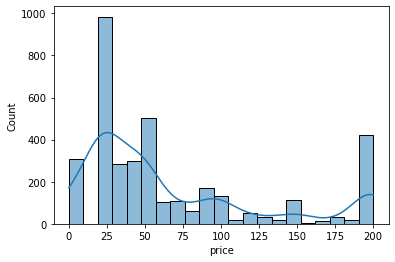

In [37]:
sns.histplot(data = df1, x = 'price',kde = True)

In [54]:
fig  = px.histogram(data_frame=df1, x = 'price', title='Price of Udemy Course')
fig.show()

In [56]:
fig = px.box(data_frame= df1, x = 'price')
fig.show()

<AxesSubplot:ylabel='Frequency'>

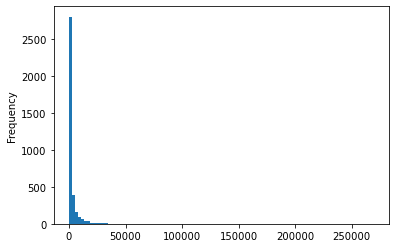

In [32]:
df1.num_subscribers.plot(kind = 'hist', bins = 100)

In [64]:
fig = px.histogram(data_frame= df1,x = 'num_subscribers',nbins = 250)
fig.show()

<AxesSubplot:xlabel='num_subscribers', ylabel='Count'>

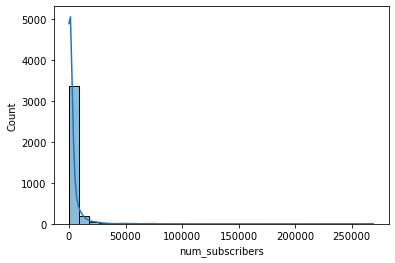

In [47]:
sns.histplot(data = df1, x = 'num_subscribers', bins = 30, kde = True)

<AxesSubplot:xlabel='num_reviews', ylabel='Count'>

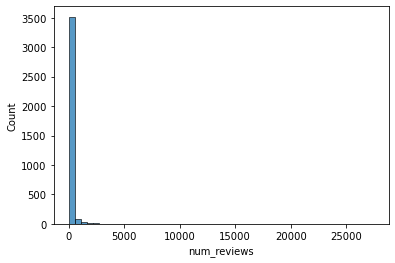

In [35]:
sns.histplot(df1.num_reviews, bins = 50)

In [68]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [72]:
fig = px.histogram(data_frame= df1, x = 'num_reviews', marginal='box',hover_data = ['course_title','subject'] )
fig.show()

In [73]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18 20:58:58+00:00
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09 16:34:20+00:00
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016-12-19 19:26:30+00:00
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017-05-30 20:07:24+00:00
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016-12-13 14:57:18+00:00


In [76]:
fig =px.histogram(data_frame= df1, x = 'num_lectures', hover_data= ['course_title','subject'], marginal = 'box')
fig.show()

In [80]:
fig = px.histogram(data_frame= df1, x = 'content_duration', hover_data=['course_title','subject','content_duration'], marginal= 'box')
fig.show()

<AxesSubplot:xlabel='content_duration', ylabel='Count'>

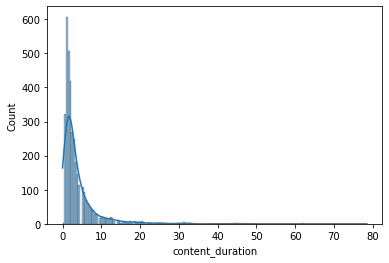

In [82]:
sns.histplot(df1.content_duration, kde = True)

In [77]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


<AxesSubplot:>

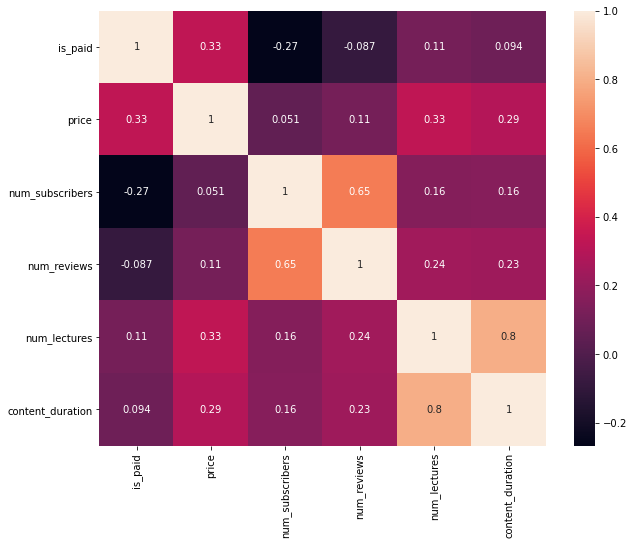

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True )

In [100]:
df1.corr()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


In [115]:
index_vals = df1['level'].astype('category').cat.codes
index_vals

0       0
1       0
2       3
3       0
4       3
       ..
3673    0
3674    1
3675    0
3676    0
3677    1
Length: 3678, dtype: int8

In [112]:
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='price',
                                 values=df1['price']),
                            dict(label='num_subscribers',
                                 values=df1['num_subscribers']),
                            dict(label='num_reviews',
                                 values=df1['num_reviews']),
                            dict(label='num_lectures',
                                 values=df1['num_lectures']),
                           dict(label='content_duration',
                                 values=df1['content_duration'])],
                showupperhalf=False, 
                text=df1['level'],
                marker=dict(color=index_vals,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='UDEMY Courses',
    width=1000,
    height=1000,
)

fig.show()


<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



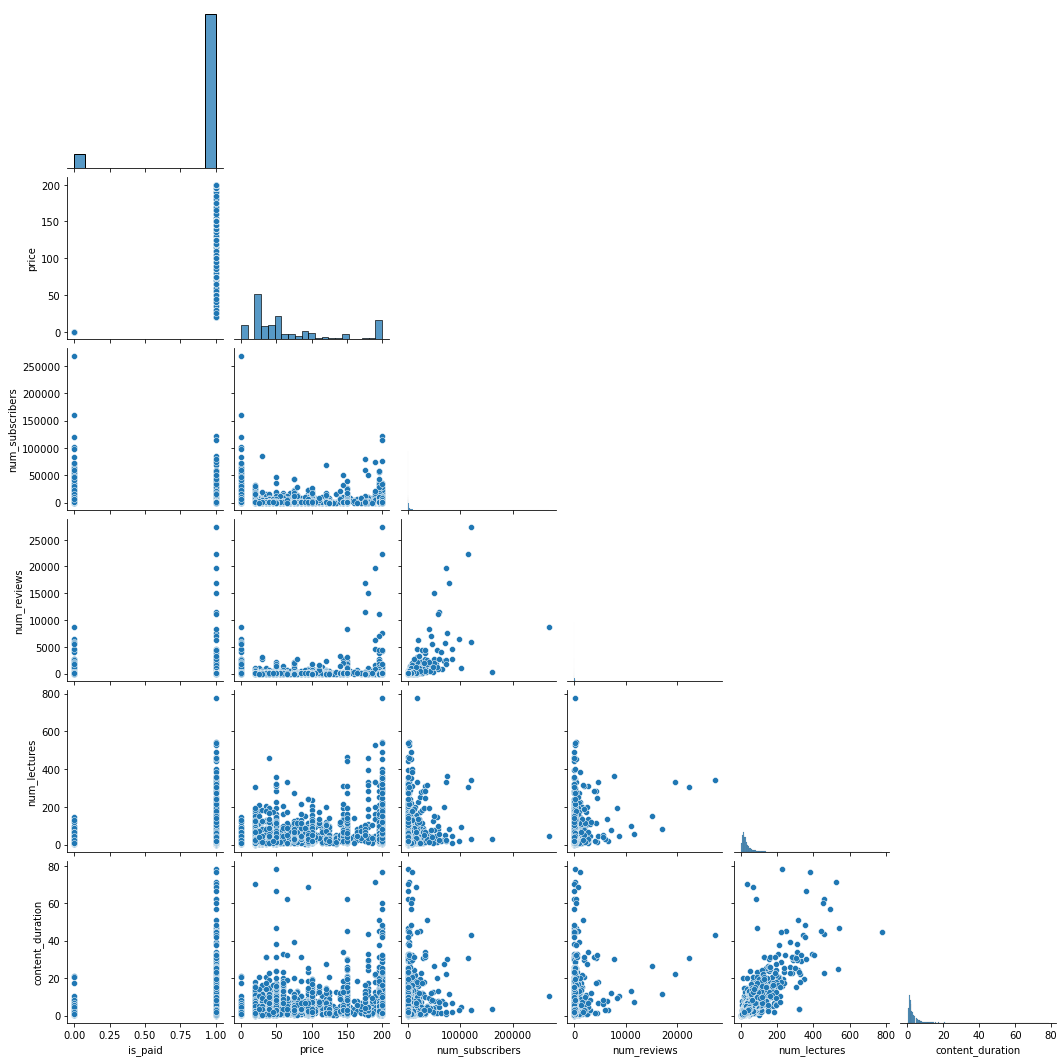

In [114]:
sns.pairplot(df1,corner = True)

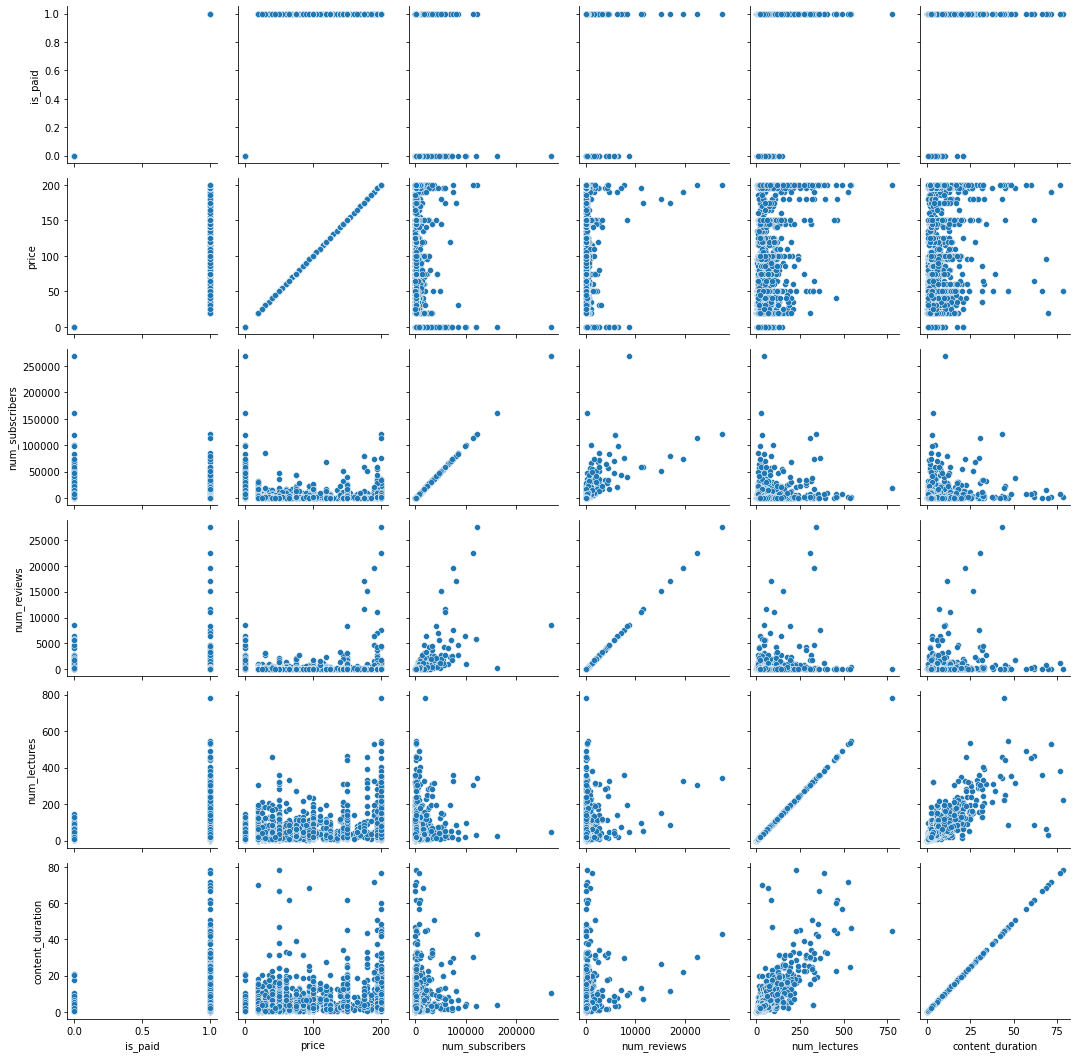

In [117]:
g = sns.PairGrid(df1)
g.map(sns.scatterplot)

plt.show()


In [122]:
fig = px.histogram(data_frame= df1, x = 'subject')
fig.show()

<AxesSubplot:>

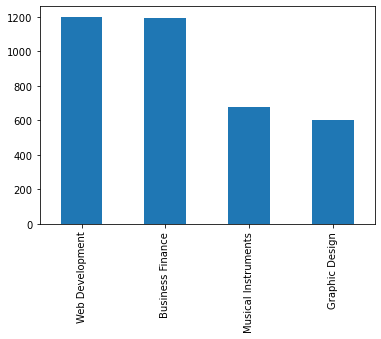

In [127]:
df1.subject.value_counts().plot.bar()

In [129]:
df1.date

0      2017-01-18 20:58:58+00:00
1      2017-03-09 16:34:20+00:00
2      2016-12-19 19:26:30+00:00
3      2017-05-30 20:07:24+00:00
4      2016-12-13 14:57:18+00:00
                  ...           
3673   2016-06-14 17:36:46+00:00
3674   2017-03-10 22:24:30+00:00
3675   2015-12-30 16:41:42+00:00
3676   2016-08-11 19:06:15+00:00
3677   2014-09-28 19:51:11+00:00
Name: date, Length: 3678, dtype: datetime64[ns, UTC]

In [137]:
df1.date.dt.year

0       2017
1       2017
2       2016
3       2017
4       2016
        ... 
3673    2016
3674    2017
3675    2015
3676    2016
3677    2014
Name: date, Length: 3678, dtype: int64

In [149]:
df1.groupby(df1.date.dt.year)['subject'].value_counts().unstack().T

date,2011,2012,2013,2014,2015,2016,2017
subject,,,,,,,
Business Finance,NaN,6.0,84.0,192.0,339.0,349.0,225.0
Graphic Design,NaN,10.0,23.0,66.0,168.0,181.0,155.0
Musical Instruments,NaN,10.0,39.0,120.0,171.0,228.0,112.0
Web Development,5.0,19.0,56.0,113.0,336.0,448.0,223.0


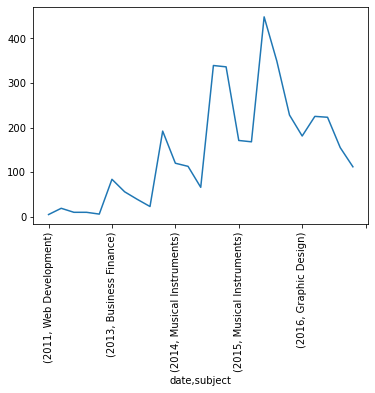

In [152]:
df1.groupby(df1.date.dt.year).subject.value_counts().plot(kind = 'line')
plt.xticks(rotation = 90);

top 15 ücretsiz kurs top 15 ücreli kurs

In [158]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18 20:58:58+00:00
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09 16:34:20+00:00


In [183]:
top_15_paid = df1[df1.is_paid == True][['course_title','date','subject','num_subscribers','price']].sort_values(by='num_subscribers',ascending=False)[:15]

In [184]:
top_15_free = df1[df1.is_paid == False][['course_title','date','subject','num_subscribers']].sort_values(by='num_subscribers',ascending=False)[:15]

In [185]:
top_15_free

,course_title,date,subject,num_subscribers
2827,Learn HTML5 Programming From Scratch,2013-02-14 07:03:41+00:00,Web Development,268923
3032,Coding for Entrepreneurs Basic,2013-06-09 15:51:55+00:00,Web Development,161029
2783,Build Your First Website in 1 Week with HTML5 ...,2014-04-08 16:21:30+00:00,Web Development,120291
1896,Free Beginner Electric Guitar Lessons,2012-06-15 17:00:33+00:00,Musical Instruments,101154
2589,Web Design for Web Developers: Build Beautiful...,2015-04-13 18:29:47+00:00,Web Development,98867
3289,Practical PHP: Master the Basics and Code Dyna...,2014-07-19 03:02:05+00:00,Web Development,83737
3665,Beginner Photoshop to HTML5 and CSS3,2012-07-27 12:54:57+00:00,Web Development,73110
2782,Web Development By Doing: HTML / CSS From Scratch,2013-09-25 00:42:09+00:00,Web Development,72932
3325,HTML and CSS for Beginners - Build a Website &...,2015-03-19 19:07:12+00:00,Web Development,70773
492,Bitcoin or How I Learned to Stop Worrying and ...,2013-04-20 02:25:22+00:00,Business Finance,65576


In [186]:
top_15_paid

,course_title,date,subject,num_subscribers,price
3230,The Web Developer Bootcamp,2015-11-02 21:13:27+00:00,Web Development,121584,200
3232,The Complete Web Developer Course 2.0,2016-03-08 22:28:36+00:00,Web Development,114512,200
2619,Learn Javascript & JQuery From Scratch,2013-10-10 15:19:29+00:00,Web Development,84897,30
3247,JavaScript: Understanding the Weird Parts,2015-03-12 23:19:54+00:00,Web Development,79612,175
1979,Pianoforall - Incredible New Way To Learn Pian...,2014-08-07 06:27:51+00:00,Musical Instruments,75499,200
3204,Angular 4 (formerly Angular 2) - The Complete ...,2016-02-11 07:29:29+00:00,Web Development,73783,190
2701,Become a Web Developer from Scratch,2011-11-19 21:51:20+00:00,Web Development,69186,120
3246,Learn and Understand AngularJS,2014-09-24 00:57:25+00:00,Web Development,59361,175
3251,Learn and Understand NodeJS,2015-08-31 21:07:48+00:00,Web Development,58208,195
2662,The Complete HTML & CSS Course - From Novice T...,2015-07-27 16:57:52+00:00,Web Development,57422,195


In [202]:
fig = px.bar(data_frame=top_15_free, x = 'course_title', y = 'num_subscribers')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [ ]:
fig = px.bar(top_15_paid_courses, y= 'num_subscribers', x='course_title', hover_data = top_15_paid_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
